# **student performance prediction**
The student performance prediction model is designed to predict a student's exam score or performance level using facotrs like study hours , attendence,sleep hours, parents education , mental health and previous marks.

 This project helps in identifying students may need academic support before the final results are declared.

By analyzing histtorical data, the model uses machine learning algorithm to find relationships between different features and final exam score.
  
It help to understand the  major factors that affect student performance.
The model is based on supervised learning where input features are used to train algorithms like linear regression .
 firstly we will import all the needed libraries.
 **pandas** - used to load,clean and handle data(like reading CSV files and managing tables.
 **matplot** **and** **seaborn** - used for visualization , making grapks and charts to show relationships in data.
 **sklearn** - contains tools for machine leaning , model trainiing , testing , and evaluation.
 **labelencoder** - used to convert categorial data(like gender) into number for model to understand .





In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

Then read the dataset using the pandas .

then using df.info() we can get the summary of the dataset's structure. It shows the column name, data types,non-null counts, memory usage.it give the output as text summary. it works on all columns .

using df.head() and df.tail() , we extracted the first  five and last five rows respectively .

df.describe() gives statistical summary of numerical columns. it shows count, mean, min,max etc. it works mainly for numeric columns (by default). it is used to analyse numerical data distribution .


In [7]:
df = pd.read_csv("/content/student_habits_performance.csv")
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [9]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [10]:
df.tail()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


In [11]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


then using df.isnull() missing values were found in [pparental education data. then we found the basic count of parents education . it tells us how many times each education level appears in the dataset .

then using next code we fill the missing values .
fillna()-  it is function used to fill mising values .
inplace true helps to apply the change directly to the dataframe (no need to reassign )


In [12]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [13]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167


In [14]:

df['parental_education_level'].fillna(df['parental_education_level'].mode()[0],inplace= True)

/tmp/ipython-input-2325150941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parental_education_level'].fillna(df['parental_education_level'].mode()[0],inplace= True)


In [15]:
df['parental_education_level'].isnull().sum()

np.int64(0)

In [16]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


then using the process encoding we will replace the categorical data with the numerical data so that our model can easily understand it .
then from sklearnpreprocessing we imported label encoder to encode our data of categorical column.


In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols_to_encode = ['gender','part_time_job','diet_quality','internet_quality','parental_education_level','extracurricular_participation']
for col in cols_to_encode:

    df[col]=le.fit_transform(df[col])

In [18]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,0,6,2,0,8,1,56.2
1,S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,1,6,1,0,8,0,100.0
2,S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,2,1,1,2,1,0,34.3
3,S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,2,4,2,1,1,1,26.8
4,S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,0,3,2,1,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,0,2,1,1,6,1,76.1
996,S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,2,1,1,0,6,1,65.9
997,S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,1,5,0,1,9,1,64.4
998,S1998,24,1,5.4,4.1,1.1,1,100.0,7.6,0,0,0,0,1,0,69.7


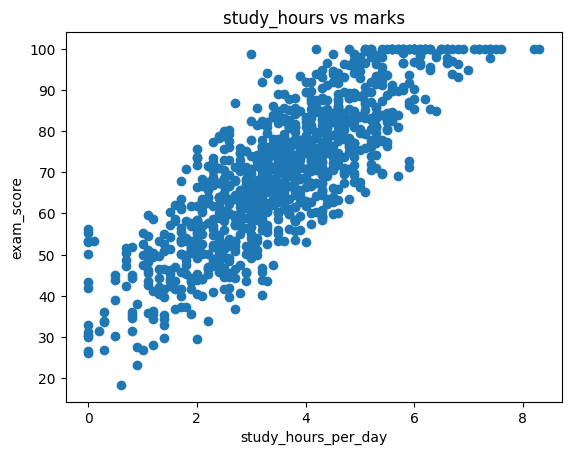

In [19]:
# visualizing the data
plt.scatter(df['study_hours_per_day'],df['exam_score'])
plt.xlabel('study_hours_per_day')
plt.ylabel('exam_score')
plt.title("study_hours vs marks")
plt.show()

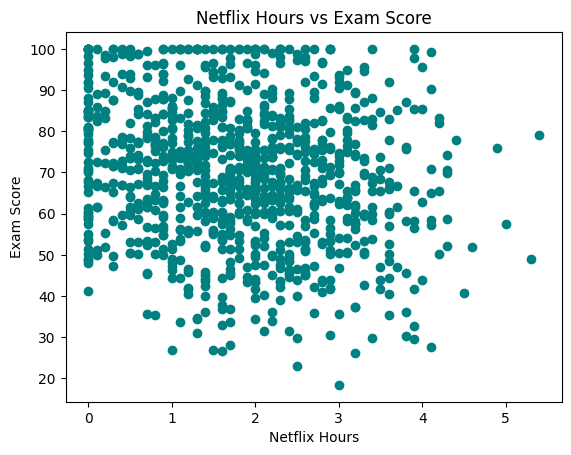

In [30]:
plt.scatter(df['netflix_hours'], df['exam_score'], color='teal')
plt.title("Netflix Hours vs Exam Score")
plt.xlabel("Netflix Hours")
plt.ylabel("Exam Score")
plt.show()

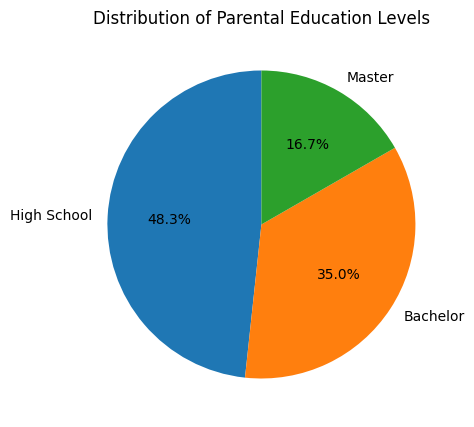

In [38]:
plt.figure(figsize=(7,5))

# Create a mapping from encoded values to original labels
# Assuming alphabetical order for LabelEncoder: 0:Bachelor, 1:High School, 2:Master
# We can confirm this by checking the original value_counts and encoded values.
education_mapping = {
    0: 'Bachelor',
    1: 'High School',
    2: 'Master'
# Apply the mapping to get the labels for the pie chart
pie_labels = df['parental_education_level'].value_counts().rename(index=education_mapping)

pie_labels.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Parental Education Levels')
plt.ylabel('')
plt.show()

/tmp/ipython-input-1888572539.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_education_label', y='exam_score', data=average_scores_by_education, palette='viridis')


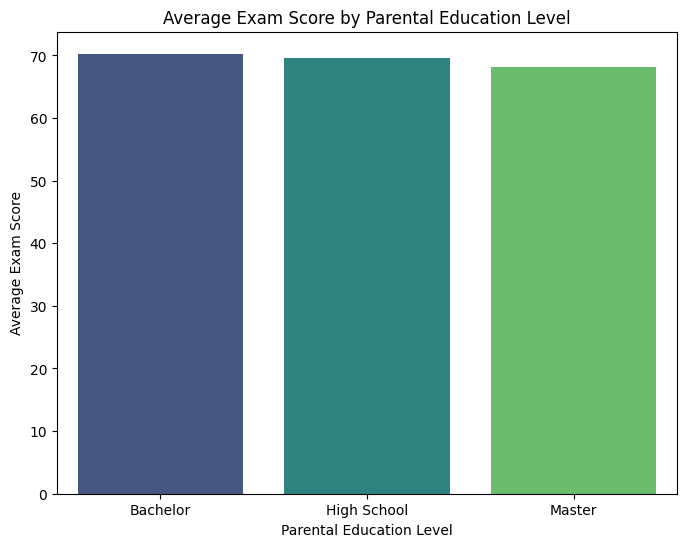

In [39]:

average_scores_by_education = df.groupby('parental_education_level')['exam_score'].mean().reset_index()
average_scores_by_education['parental_education_label'] = average_scores_by_education['parental_education_level'].map(education_mapping)

plt.figure(figsize=(8, 6))
sns.barplot(x='parental_education_label', y='exam_score', data=average_scores_by_education, palette='viridis')
plt.title('Average Exam Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Exam Score')
plt.show()

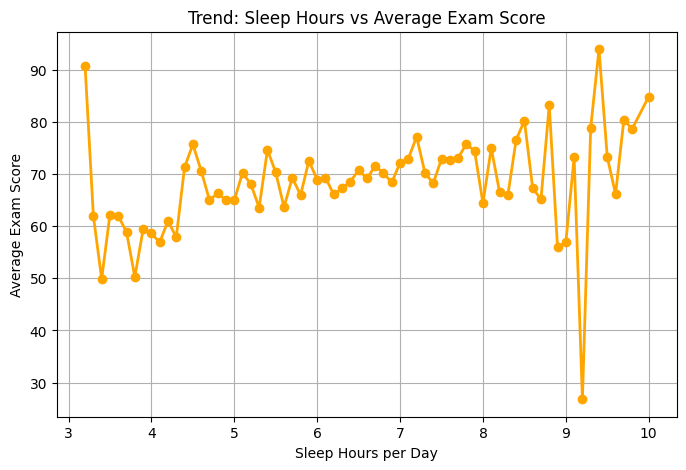

In [50]:
sleep_trend = df.groupby('sleep_hours')['exam_score'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(sleep_trend['sleep_hours'], sleep_trend['exam_score'], marker='o', color='orange', linewidth=2)
plt.title("Trend: Sleep Hours vs Average Exam Score")
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Average Exam Score")
plt.grid(True)
plt.show()

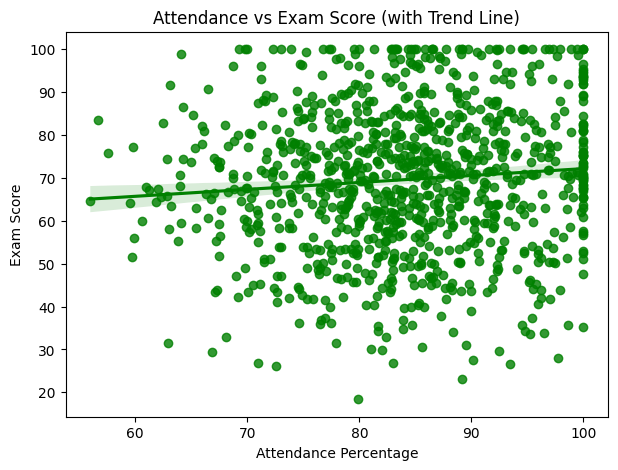

In [47]:
plt.figure(figsize=(7,5))
sns.regplot(x='attendance_percentage', y='exam_score', data=df, color='green')
plt.title("Attendance vs Exam Score (with Trend Line)")
plt.xlabel("Attendance Percentage")
plt.ylabel("Exam Score")
plt.show()

then we droped the student id column as it was of no use to us . it was for refferance of data of particular student so we droped it .

then we assigned variable to feartures as X on which we trained our model and Y to target value the value we want to predict .

then we splited our data into training and testing data as 80% training data and 20% as testing data


In [21]:
# droping the student id as it is of our no use
df = df.drop('student_id' , axis=1)

In [22]:
X = df.drop(['exam_score'], axis = 1 ) # features all columns except exam score and student_id
y = df['exam_score']# target that value we want to predict

In [23]:
# spliting into training and testing
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42)
# test_size is 20% data for testing
#random state ensures same split every time


then we created an object of the linear regression class. at this point , the model is empty, it hasn't learnd anything yet.

fit() is training function. it tells the model to learn the relationship between input features and the target .

In [24]:
#train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test) # make predictions

then after training the model . we calculated errors in our model .
MAE - mean absolute error its value is lower better . it tells the average of absolute differences between actual and predicted values .

MSE - Mean squared error its value is lower better . it tell the average of squared differences - larger errors penalized more.

  R square - it explains how much the target variation is expalined by model . it 's value close to 1 means more accurate.  

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Absolute Error: 4.172475975530878
Mean Squared Error: 26.497748783647193
R² Score: 0.8966663721200843


In [27]:
print(model)

LinearRegression()


In [28]:
# Example new student's data (update values as per your dataset)
# Format: [age, gender, study_hours_per_day, social_media_hours, netflix_hours,
#          part_time_job, attendance_percentage, sleep_hours, diet_quality,
#          exercise_frequency, parental_education_level, internet_quality,
#          extracurricular_participation, mental_health_rating]

new_student = [[18, 1, 4, 2, 1, 0, 85, 7, 2, 1, 2, 1, 1, 8]]

predicted_score = model.predict(new_student)
print("Predicted Exam Score:", predicted_score[0])

Predicted Exam Score: 65.21970325754768


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
